# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [24]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = base_url + "appid=" + weather_api_key + "&units=metric&q="

# Set up lists to hold reponse info
name = []
lat = []
long = []
temp = []
humid = []
cloud = []
windspd = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        print(f"{response['name']}\nLatitude: {response['coord']['lat']}\nTemperature: {response['main']['temp']}C\nHumidity: {response['main']['humidity']}%\nCloudiness: {response['clouds']['all']}%\nWind Speed: {response['wind']['speed']}m/s\n")
    except:
        print(f"There was an error in retrieving the data for {city}\n")
        continue


Skellefteå
Latitude: 64.7507
Temperature: 12.2C
Humidity: 76%
Cloudiness: 60%
Wind Speed: 4.12m/s

Guerrero Negro
Latitude: 27.9769
Temperature: 23.52C
Humidity: 80%
Cloudiness: 43%
Wind Speed: 3m/s

Hobart
Latitude: -42.8794
Temperature: 11.02C
Humidity: 59%
Cloudiness: 20%
Wind Speed: 2.06m/s

Ulfborg
Latitude: 56.2673
Temperature: 14.48C
Humidity: 84%
Cloudiness: 90%
Wind Speed: 2.82m/s

Zyryanskoye
Latitude: 56.8306
Temperature: 21.61C
Humidity: 60%
Cloudiness: 99%
Wind Speed: 2.36m/s

Busselton
Latitude: -33.65
Temperature: 13.43C
Humidity: 69%
Cloudiness: 82%
Wind Speed: 10.79m/s

Michigan City
Latitude: 41.7075
Temperature: 23.34C
Humidity: 97%
Cloudiness: 100%
Wind Speed: 0m/s

Baarle-Hertog
Latitude: 51.4041
Temperature: 13.88C
Humidity: 91%
Cloudiness: 40%
Wind Speed: 2.06m/s

Punta Arenas
Latitude: -53.15
Temperature: 1.06C
Humidity: 93%
Cloudiness: 20%
Wind Speed: 3.6m/s

Assiut
Latitude: 27.181
Temperature: 31.65C
Humidity: 30%
Cloudiness: 0%
Wind Speed: 3.49m/s

Porto-Nov

In [25]:
# Print the city count to confirm sufficient count
print(f"There are {len(name)} cities in the dataset.")

There are 563 cities in the dataset.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Create a data frame from lists of response info
cities_df = pd.DataFrame({"City": name,
                            "Latitude": lat,
                            "Longitude": long,
                            "Temperature (C)": temp,
                            "Humidity (%)": humid,
                            "Cloudiness (%)": cloud,
                            "Wind Speed (m/s)": windspd}).rename_axis("ID")
#cities_df = cities_df

cities_df.to_csv("../output_data/cities.csv", index=True, header=True)

cities_df


,City,Latitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s)
ID,,,,,,
0,Skellefteå,64.7507,12.20,76,60,4.12
1,Guerrero Negro,27.9769,23.52,80,43,3.00
2,Hobart,-42.8794,11.02,59,20,2.06
3,Ulfborg,56.2673,14.48,84,90,2.82
4,Zyryanskoye,56.8306,21.61,60,99,2.36
...,...,...,...,...,...,...
558,Aksarka,66.5606,29.08,35,0,6.27
559,Zabid,14.1951,32.35,57,100,4.49
560,Buchanan,5.8808,23.44,82,79,2.37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
#  Get the indices of cities that have humidity over 100%.
print(f"There are {len(cities_df.loc[cities_df['Humidity (%)'] > 100, :])} cities in the dataset with a humidity greater than 100%.")


There are 0 cities in the dataset with a humidity greater than 100%.


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

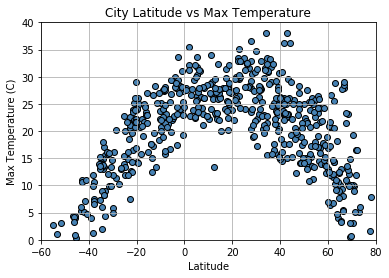

In [71]:
plt.scatter(cities_df["Latitude"], cities_df["Temperature (C)"], color = "SteelBlue", edgecolors= "black")

plt.title("City Latitude vs Max Temperature")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60,80)
plt.ylim(0,40)

plt.savefig("../output_data/fig1.png")

plt.show()


## Latitude vs. Humidity Plot

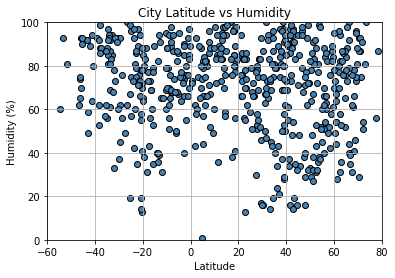

In [72]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], color = "SteelBlue", edgecolors= "black")

plt.title("City Latitude vs Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,80)
plt.ylim(0,100)

plt.savefig("../output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

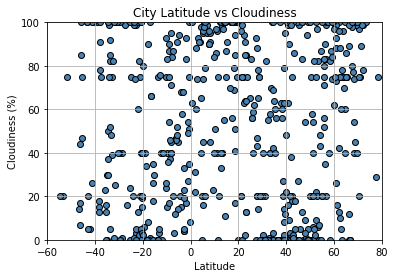

In [73]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"], color = "SteelBlue", edgecolors= "black")

plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,80)
plt.ylim(0,100)

plt.savefig("../output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

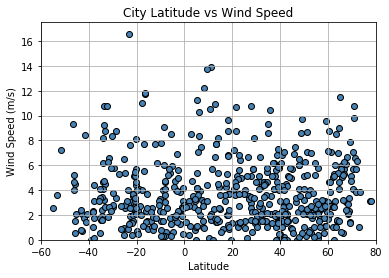

In [97]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (m/s)"], color = "SteelBlue", edgecolors= "black")

plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60,80)
plt.ylim(0,17.5)

plt.savefig("../output_data/fig4.png")

plt.show()


## Linear Regression

In [86]:
# Separate the dataset into dataframes for North and South Hemisphere
nth_hem_df = cities_df.loc[cities_df['Latitude'] > 0, :]
sth_hem_df = cities_df.loc[cities_df['Latitude'] < 0, :]


,City,Latitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s)
ID,,,,,,
2,Hobart,-42.8794,11.02,59,20,2.06
5,Busselton,-33.6500,13.43,69,82,10.79
8,Punta Arenas,-53.1500,1.06,93,20,3.60
11,Bengkulu,-3.8004,29.98,64,15,4.71
12,Carutapera,-1.1950,23.86,93,54,2.51
...,...,...,...,...,...,...
545,Armidale,-30.5167,9.92,60,40,2.35
546,Shakawe,-18.3667,15.87,31,0,1.96
548,Venado Tuerto,-33.7456,8.20,81,85,4.72


In [160]:
# Create a function to calculate linear regression for each graph

def linreg(x,y,hem):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = "SteelBlue", edgecolors= "black")
    plt.plot(x,regress_values, color = "red", alpha=0.6)
    #plt.annotate(line_eq,pos,fontsize=15,color="red", alpha=0.8) 
    plt.title(f"{x.name} vs {y.name} {hem}ern Hemisphere")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print(f"The linear regression equation for these factors is:\n{line_eq}\n")
    correlation = st.pearsonr(x,y)
    if correlation[0] > 0:
        correlation_direction = "positive"
    else:
        correlation_direction = "negative"
    if abs(correlation[0]) < 0.3:
        correlation_type = "no correlation"
    elif abs(correlation[0]) < 0.5:
        correlation_type = f"a weak {correlation_direction} correlation"
    elif abs(correlation[0]) < 0.7:
        correlation_type = f"a moderate {correlation_direction} correlation"
    else:
        correlation_type = f"a strong {correlation_direction} correlation"
    print(f"The correlation coefficient for these factors is {round(correlation[0],2)}")
    print(f"This indicates {correlation_type} between these factors.")

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

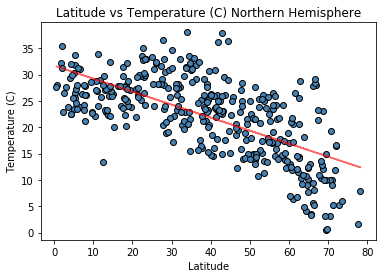

The linear regression equation for these factors is:
y = -0.25x + 31.71

The correlation coefficient for these factors is -0.66
This indicates a moderate negative correlation between these factors.


In [161]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Temperature (C)"], "North")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

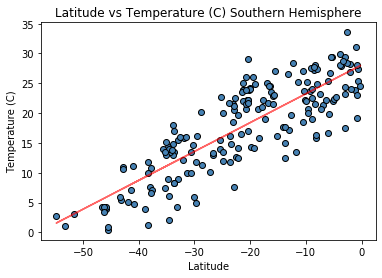

The linear regression equation for these factors is:
y = 0.48x + 28.08

The correlation coefficient for these factors is 0.84
This indicates a strong positive correlation between these factors.


In [162]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Temperature (C)"],"South")

This linear regression is modelling the relationship between latitude and temperature.  
The moderate and strong correlations has been returned for North and South hemispheres respectively.  
You would be able to use the linear regression equation to make a reasonable estimate of the maximum daily temperature for a city, when given it's latitude.  
Note that the linear regression equations for each hemisphere are significantly different. This could be due to sampling error. It would warrant further equation.  
Ideally both equations should have the same (or near equal) intercept. This would make sense logically as for both equations the intercept represents the same real world value, ie the temperature at the equator.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

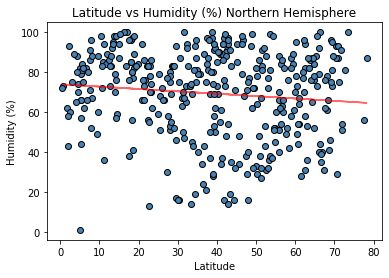

The linear regression equation for these factors is:
y = -0.12x + 73.98

The correlation coefficient for these factors is -0.11
This indicates no correlation between these factors.


In [163]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Humidity (%)"], "North")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

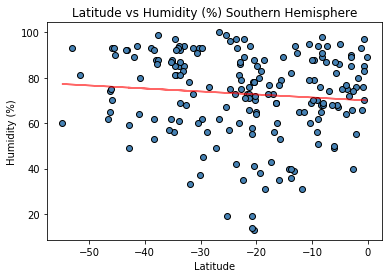

The linear regression equation for these factors is:
y = -0.13x + 69.98

The correlation coefficient for these factors is -0.09
This indicates no correlation between these factors.


In [164]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Humidity (%)"],"South")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

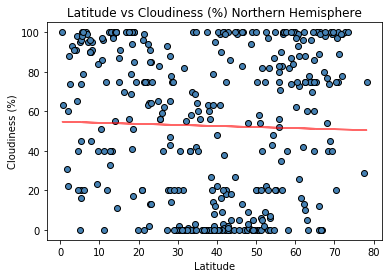

The linear regression equation for these factors is:
y = -0.05x + 54.75

The correlation coefficient for these factors is -0.03
This indicates no correlation between these factors.


In [165]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Cloudiness (%)"], "North")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

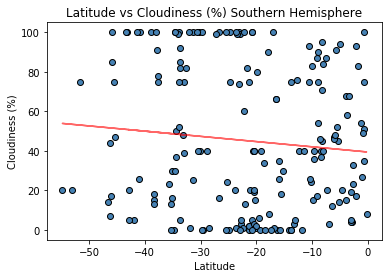

The linear regression equation for these factors is:
y = -0.26x + 39.41

The correlation coefficient for these factors is -0.1
This indicates no correlation between these factors.


In [166]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Cloudiness (%)"],"South")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

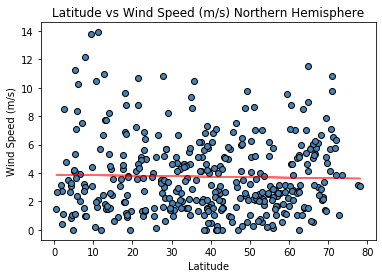

The linear regression equation for these factors is:
y = -0.0x + 3.87

The correlation coefficient for these factors is -0.03
This indicates no correlation between these factors.


In [167]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Wind Speed (m/s)"], "North")

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

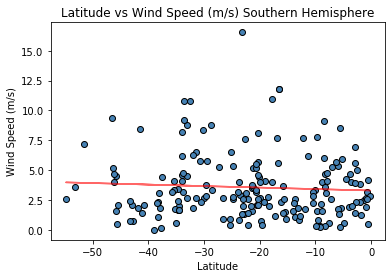

The linear regression equation for these factors is:
y = -0.01x + 3.29

The correlation coefficient for these factors is -0.06
This indicates no correlation betwen these factors.


In [159]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Wind Speed (m/s)"],"South")